<a href="https://colab.research.google.com/github/solkan1201/DeepLearningBook/blob/master/TextToFeaturesSection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
import sys

In [2]:
Text = 'I am learning NLP'
pd.get_dummies(Text.split())

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


In [5]:
text = ["I love NLP and I will learn NLP in 2 months"]
vectorizer = CountVectorizer()
vectorizer.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [6]:
vector = vectorizer.transform(text)

In [7]:
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love': 3, 'nlp': 5, 'and': 0, 'will': 6, 'learn': 2, 'in': 1, 'months': 4}
[[1 1 1 1 1 2 1]]


N-grams


In [9]:
Text = "I am learning NLP"

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
TextBlob(Text).ngrams(1)

[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

In [12]:
TextBlob(Text).ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

In [13]:
vectorizer = CountVectorizer(ngram_range=(2,2))
vectorizer.fit(text)
vector = vectorizer.transform(text)
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in months': 1}
[[1 1 1 1 1 1 1]]


In [17]:
text = ['The quick brown fox jumped over the lazy dog.']

vectorizer = HashingVectorizer(n_features=10)
vector = vectorizer.transform(text)

print(vector.shape)
print(vector.toarray())

(1, 10)
[[ 0.          0.57735027  0.          0.          0.          0.
   0.         -0.57735027 -0.57735027  0.        ]]


In [5]:
sentences = [['I', 'love', 'nlp'],
             ['I', 'will', 'learn', 'nlp','in','2','months'],
             ['nlp','is','future'],
             ['nlp','saves','time','and','solves','lot','of','industry','problems'],
             ['nlp','uses','machine','learning']]

In [23]:
skipgram = Word2Vec(sentences= sentences,
                    size= 50,
                    window= 3,
                    min_count= 1,
                    sg= 1)
print('resultado skipgram', skipgram)
print(skipgram['nlp'])

resultado skipgram Word2Vec(vocab=21, size=50, alpha=0.025)
[-0.00277579  0.00971078  0.00986495  0.00994    -0.00992608  0.00606933
  0.00463878 -0.00246574 -0.00792419 -0.00872095  0.00850694  0.00674326
  0.00439649 -0.0009913   0.00715353 -0.00729509  0.00233857  0.0060108
  0.00649505 -0.00109671 -0.00092277 -0.00068843  0.00716507 -0.00930071
 -0.00558584  0.00208905 -0.00561169 -0.0009205   0.00957926 -0.00797472
  0.00184515  0.00438622  0.00756973 -0.00048488 -0.00374605 -0.00690665
 -0.00485219  0.00519499  0.00755167  0.0090767  -0.00336001  0.0053933
  0.0067566  -0.00863414 -0.0055512   0.0015594  -0.0004297  -0.00526771
 -0.00807297  0.00767055]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [ ]:
print(skipgram['nlp'])

In [24]:
skipgram.save('skipgram.bin')
skipgram = Word2Vec.load('skipgram.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


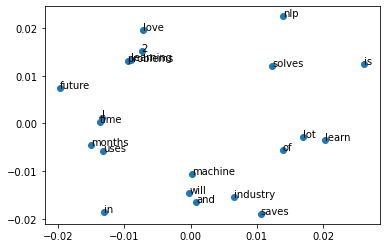

In [27]:
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i, 0 ], result[i, 1]))

plt.show()

In [8]:

!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-09-09 10:26:40--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.44.150
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.44.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  16.8MB/s    in 98s     

2020-09-09 10:28:18 (16.1 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [9]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary= True)
print(model.similarity('this', 'is'))
print(model.similarity('post', 'book'))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


0.40797037
0.057204384


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [10]:
# word_vectors
model.most_similar(positive=['woman', 'king'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [11]:
fast = FastText(sentences, size= 20, window=1, min_count=1, workers=5, min_n=1, max_n=2)
print(fast['nlp'])

[-0.00457873  0.00607572 -0.01117205  0.00556346 -0.00782249 -0.01375918
  0.00674984 -0.00841166 -0.00319377  0.00924592  0.002137   -0.01064047
  0.01226169  0.00853122  0.0135972  -0.00256507  0.00818711 -0.00410288
 -0.00540261 -0.01359837]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [12]:
print(fast['deep'])

[ 0.00272998 -0.0024248  -0.00769168 -0.00395748  0.01148113 -0.00639981
  0.00637095 -0.01249581 -0.01206758  0.01400672 -0.00476895 -0.00231236
  0.02008674 -0.0195196   0.01556754 -0.01580737  0.00509422 -0.00957166
 -0.00963916 -0.02059008]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


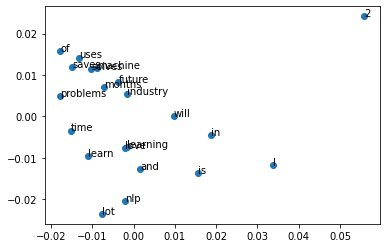

In [13]:
fast.save('fast.bin')
fast =Word2Vec.load('fast.bin')

X = fast[fast.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.vocab)

for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()